# Artificial Neural Network - Classification

## Introduction

We will be using the [Pima Indians Diabetis] (http://networkrepository.com/pima-indians-diabetes.php) dataset, which was built from National Institute of Diabetes and Digestive and Kidney Diseases; Includes cost data (donated by Peter Turney)

Alternatively the same data set can be found at https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
The train file can be renamed as pima-indians-diabetes.csv 

For each record in the dataset it is provided: 

- preg = Number of times pregnant
- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- pres = Diastolic blood pressure (mm Hg)
- skin = Triceps skin fold thickness (mm)
- test = 2-Hour serum insulin (mu U/ml)
- mass = Body mass index (weight in kg/(height in m)^2)
- pedi = Diabetes pedigree function
- age = Age (years)
- class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes) 

More information about the features is available on the website above.

In [11]:
#Load libraries and seed random number generator
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
import pandas as pd


import numpy
# fix random seed for reproducibility
#A random seed is used to ensure that results are reproducible. 
#In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs. 
#Reproducibility is an extremely important concept in data science and other fields.
numpy.random.seed(7)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Activity 1: Read from file

Import the data and do the following:
* Show the top 5 of the dataset
* Show the datatype

In [1]:
import pandas as pd

# Define column names
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load dataset with custom column names
pima = pd.read_csv("data\pima-indians-diabetes.csv", names=col_names)





In [24]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Activity 2: Split into training and testing dataset

Split the data into train and test data sets. Assign X for the training dataset and y for testing dataset.
* Use all features and class for X. Use MinMaxScaler or StandardScaler for rescaling
* Exclude class column for y

In [26]:
# Splitting the dataset into input (X) and output (y) variables


X = dataset.iloc[:, 0:8]  # Features
y = dataset.iloc[:, 8]    # Target variable (class label)

# Scaling the features using StandardScaler
X = StandardScaler().fit_transform(X)

# Splitting the dataset into training and testing sets
test_size = 0.30  # Percentage of data to be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)


In [6]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [27]:
X_train

array([[-0.54687397, -1.65404056, -0.3669079 , ..., -1.50818915,
        -0.64801161, -0.87010264],
       [-0.54687397,  2.38255602,  0.04641078, ...,  0.34367529,
         0.31189802,  2.45056338],
       [ 0.04683068,  0.12957188,  0.04641078, ..., -0.39199688,
         2.02947217,  1.00309358],
       ...,
       [-1.14057861,  0.19215477,  0.56305914, ...,  0.54661934,
         1.0031537 , -0.87010264],
       [-0.25002164, -0.43367415, -0.3669079 , ..., -1.15303706,
         0.62281214, -0.87010264],
       [ 0.64053533, -1.12208597,  0.45972947, ..., -0.10026481,
        -0.27068864,  0.74765773]])

In [28]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: 1, Length: 767, dtype: int64

In [29]:
y_train

616    0
578    1
492    1
205    1
708    1
      ..
579    1
502    0
537    0
196    1
175    0
Name: 1, Length: 536, dtype: int64

## Activity 3: Define NN Model

Define the neural network model. 
* Input layer - 12 neurons, use relu activation function
* Output layer - 1 output, use sigmoid activation function since we are looking for only 2 possible values, 1:tested positive for diabetes, 0: tested negative for diabetes
Sequential() creates an empty sequential model where you can add layers sequentially.
Dense() adds a fully connected layer to the model. The first argument specifies the number of units (neurons) in the layer. input_dim=8 in the first layer specifies the input dimension, which is the number of features in your dataset.
'relu' stands for Rectified Linear Unit activation function, which introduces non-linearity to the model.
'sigmoid' activation in the output layer is common for binary classification problems. It squashes the output between 0 and 1, representing the probability of the sample belonging to the positive class.

In [35]:
model = Sequential()
#model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Activity 4: Compile NN model

Compile the neural network model.
Fit the neural network to the dataset.
Evaluate the neural network model on the test set. 

## Activity 4.1: Using SGD optimizer

In [36]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [42]:
#history = model.fit(X_train, y_train , epochs=100, batch_size=10)
#epochs: The number of epochs (iterations over the entire training dataset) to train the model.
#batch_size: The number of samples per gradient update. This parameter specifies the number of samples to be used in each training step.
history = model.fit(X_train, y_train , validation_data=(X_test,y_test), epochs=5, batch_size=10)
#This will train your model on the provided training data (X_train and y_train) for 5 epochs, with a batch size of 10 samples per update. During training, the model's performance will be evaluated on the validation data (X_test, y_test). 
#The training history containing metrics such as loss and accuracy for both training and validation sets will be stored in the history object.

Epoch 1/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7649 - val_loss: 0.4985 - val_accuracy: 0.7359
Epoch 2/5
54/54 [==============================] - 0s 788us/step - loss: 0.5018 - accuracy: 0.7593 - val_loss: 0.4929 - val_accuracy: 0.7403
Epoch 3/5
54/54 [==============================] - 0s 825us/step - loss: 0.4955 - accuracy: 0.7649 - val_loss: 0.4888 - val_accuracy: 0.7446
Epoch 4/5
54/54 [==============================] - 0s 825us/step - loss: 0.4902 - accuracy: 0.7705 - val_loss: 0.4857 - val_accuracy: 0.7489
Epoch 5/5
54/54 [==============================] - 0s 762us/step - loss: 0.4857 - accuracy: 0.7705 - val_loss: 0.4830 - val_accuracy: 0.7489


There are 768 records /samples. 30% for testing and 70% for trainning. This means, we have 230.4 for testing and remainder 537.6 for trainning. batch size for trainning is 10, that makes 54 bacthes. 
In every epoch (iteration of the trainning data, all 54 batches in the dataset have been processed.(10*53.76)

1. loss: Training loss, a measure of how well the model is performing on the training data.
2. accuracy: Training accuracy, the proportion of correct predictions on the training data.
3. val_loss: Validation loss, a measure of how well the model is performing on the validation data.
4. val_accuracy: Validation accuracy, the proportion of correct predictions on the validation data.

# Based on the provided information, it seems that both training and validation accuracies are increasing, which is a good sign. 
# However, you should monitor the loss and accuracy trends over more epochs to assess the model's performance adequately and prevent overfitting

In [41]:
scores = model.evaluate(X_test, y_test)
print("{}: {:.2f}".format(model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 499us/step - loss: 0.5053 - accuracy: 0.7316
accuracy: 73.16


### Activity 4.1.1: Observe the model accuracy on each epoch

Display the model accuracy

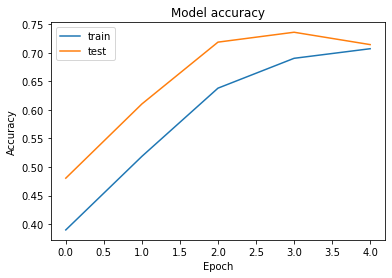

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


increasing the number of epochs can lead to improved accuracy initially, it's essential to monitor the model's performance on a validation dataset and use techniques like early stopping to prevent overfitting. 
Simply increasing the number of epochs indefinitely is not a guaranteed way to improve accuracy and can lead to overfitting.

### Activity 4.1.2: Observe the model loss on each epoch

Display the model loss

the relationship between epochs and loss illustrates the learning process of the model over time. The goal is to decrease the loss function by adjusting the model's parameters through training epochs, while also monitoring validation loss to prevent overfitting.

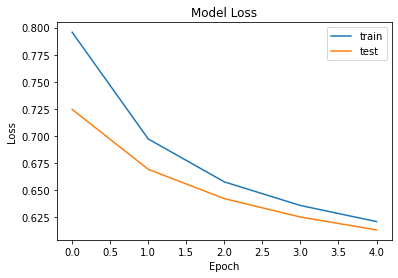

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


## Activity 4.2: Using Adam optimizer

In [32]:
model2 = Sequential()
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [33]:
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model2.fit(X_train, y_train , validation_data=(X_test,y_test), epochs=5, batch_size=10)

Epoch 1/5
54/54 [==============================] - 0s 3ms/step - loss: 0.7633 - accuracy: 0.4011 - val_loss: 0.6852 - val_accuracy: 0.5541
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6138 - val_loss: 0.6163 - val_accuracy: 0.7403
Epoch 3/5
54/54 [==============================] - 0s 981us/step - loss: 0.6198 - accuracy: 0.7015 - val_loss: 0.5726 - val_accuracy: 0.7403
Epoch 4/5
54/54 [==============================] - 0s 952us/step - loss: 0.5800 - accuracy: 0.7276 - val_loss: 0.5354 - val_accuracy: 0.7403
Epoch 5/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7388 - val_loss: 0.5118 - val_accuracy: 0.7489


In [34]:
scores = model2.evaluate(X_test, y_test)
print("{}: {:.2f}".format(model2.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 997us/step - loss: 0.5118 - accuracy: 0.7489
accuracy: 74.89


### Activity 4.2.1: Observe the model accuracy on each epoch

Display the model accuracy

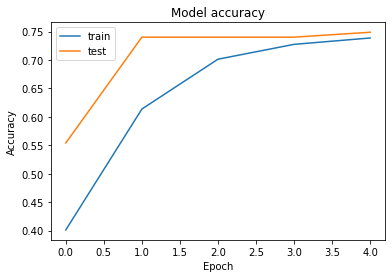

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


### Activity 4.2.2: Observe the model loss on each epoch

Display the model loss

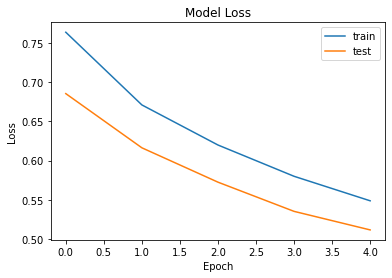

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


## Activity 5: To do. Epoch = 50

* Increase epoch value to 50
* Uses SGD optimizer
* Evaluate the model
* Plot the model accuracy
* Plot the model loss

## Activity 6: To do. Epoch = 100

* Increase epoch value to 100
* Uses SGD optimizer
* Evaluate the model
* Plot the model accuracy
* Plot the model loss

## Activity 7: To do. Epoch = 50

* Increase epoch value to 50
* Uses Adam optimizer
* Evaluate the model
* Plot the model accuracy
* Plot the model loss

## Activity 8: To do. Epoch = 100

* Increase epoch value to 100
* Uses Adam optimizer
* Evaluate the model
* Plot the model accuracy
* Plot the model loss